In [1]:
%run twisted_graphene.py #apenas primeiros vizinhos na função t_intra
from ipywidgets import interact

No grafeno AB, a inserção do campo elétrico deve abrir um pequeno gap, que satura em campos muito elevados.

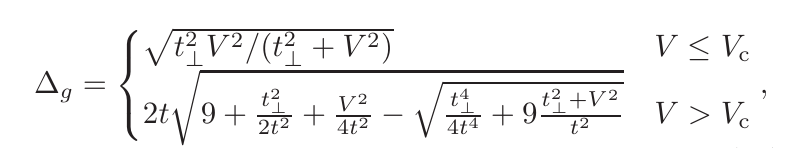

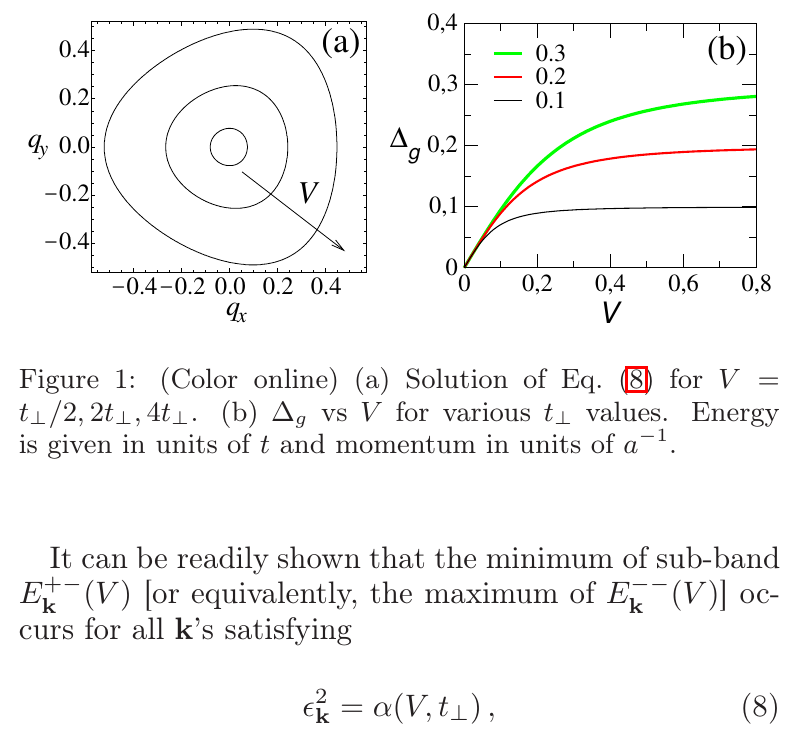

In [2]:
g=TwistedBilayerGraphene(0,1)

In [3]:
G,K,M=g.Gamma,g.K[0],g.M[0]
versor=lambda p1,p2: (p2-p1)/np.linalg.norm(p2-p1)
radius=0.2
g.set_kpath([K+radius*versor(K,M),K,K+radius*versor(K,G)],[150,150])
Ktick=g.kticks[1]
g.ell=g.ell-g.ell[Ktick]

In [4]:
g.calc_hops(3.36)

/home/vgmdu/MEGA/Mestrado/twistrônica/code/twisted_graphene.py:144: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Mestrado/twistrônica/code/twisted_graphene.py:145: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


In [5]:
g.set_hamiltonian(1.0,0.0)

In [6]:
g.calc_bands(4,0.0)

In [7]:
g.bands0=g.bands

In [8]:
@interact(V=(0,1,0.1))
def plot(V):
    g.set_hamiltonian(1.0,V)

    g.calc_bands(4,0.0)

    g.bands1=g.bands

    plt.plot(g.ell,g.bands0,color='tab:blue')
    plt.plot(g.ell,g.bands1,color='tab:orange')

    for bands in [g.bands0,g.bands1]:

        VBmax_MK=np.argmax(bands[0:Ktick,1])
        CBmin_MK=np.argmin(bands[0:Ktick,2])
        VBmax_KG=np.argmax(bands[Ktick::,1])+Ktick
        CBmin_KG=np.argmin(bands[Ktick::,2])+Ktick
        iiV=[VBmax_MK,VBmax_KG]
        iiC=[CBmin_MK,CBmin_KG]
        plt.plot(g.ell[iiV],bands[iiV,1],'ko')
        plt.plot(g.ell[iiC],bands[iiC,2],'ko')

    plt.xticks([-radius,0.0,radius],['M$\\leftarrow$','K','$\\rightarrow\Gamma$'])
    plt.grid(True,axis='x')
    plt.ylabel('Energy [eV]')
    plt.xlim((-radius,radius))
    plt.ylim((-1.5,1.5))
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='V', max=1.0), Output()), _dom_classes=('widget-inter…

Podemos aumentar $V$ vagarosamente e medir o valor do gap em cada caso.

In [9]:
VV=np.linspace(0,1,20)
bands={}
for V in VV:
    g.set_hamiltonian(1.0,V)
    g.calc_bands(4,0.0)
    bands[V]=g.bands

In [10]:
VBmaxs=[]
CBmins=[]
Ktick=g.kticks[2]
for V in VV:
    _bands=bands[V]
    VBmax_MK=np.argmax(_bands[0:Ktick,1])
    CBmin_left=np.argmin(_bands[0:Ktick,2])
    VBmax_KG=np.argmax(_bands[Ktick::,1])+Ktick
    CBmin_KG=np.argmin(_bands[Ktick::,2])+Ktick
    iiV=[VBmax_MK,VBmax_KG]
    iiC=[CBmin_left,CBmin_KG]
    VBmaxs.append(_bands[iiV,1])
    CBmins.append(_bands[iiC,2])
VBmaxs=np.array(VBmaxs)
CBmins=np.array(CBmins)

In [11]:
gaps=CBmins-VBmaxs
true_gaps=np.min(gaps,axis=1)

/home/vgmdu/MEGA/Mestrado/twistrônica/code/twisted_graphene.py:144: RuntimeWarning: invalid value encountered in double_scalars
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Mestrado/twistrônica/code/twisted_graphene.py:145: RuntimeWarning: invalid value encountered in double_scalars
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


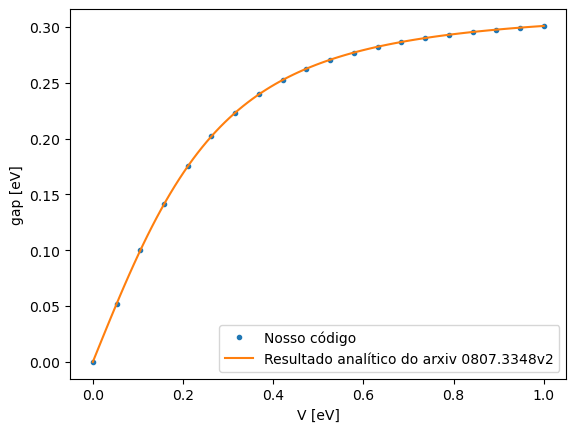

In [12]:
VV2=np.linspace(0,1,100)
tp=t_inter(0,0,0,0,1,1,0.0) #máximo valor do hopping interlayer, análogo do t_\perp no artigo
delta_g=tp*VV2/np.sqrt(tp**2+VV2**2)

plt.plot(VV,true_gaps,'.')
plt.plot(VV2,delta_g)

plt.legend(['Nosso código','Resultado analítico do arxiv 0807.3348v2'])
plt.xlabel('V [eV]')
plt.ylabel('gap [eV]')
plt.show()

Se adicionarmos os segundos vizinhos inter-camada, o que acontece com o gap?

In [13]:
np.sqrt(3.35**2+2.46**2/3)

3.638639855770285

In [14]:
g.calc_hops(3.64)

In [15]:
VV=np.linspace(0,1,20)
bands={}
for V in VV:
    g.set_hamiltonian(1.0,V)
    g.calc_bands(4,0.0)
    bands[V]=g.bands

In [16]:
VBmaxs=[]
CBmins=[]
Ktick=g.kticks[2]
for V in VV:
    _bands=bands[V]
    VBmax_MK=np.argmax(_bands[0:Ktick,1])
    CBmin_left=np.argmin(_bands[0:Ktick,2])
    VBmax_KG=np.argmax(_bands[Ktick::,1])+Ktick
    CBmin_KG=np.argmin(_bands[Ktick::,2])+Ktick
    iiV=[VBmax_MK,VBmax_KG]
    iiC=[CBmin_left,CBmin_KG]
    VBmaxs.append(_bands[iiV,1])
    CBmins.append(_bands[iiC,2])
VBmaxs=np.array(VBmaxs)
CBmins=np.array(CBmins)

In [17]:
gaps=CBmins-VBmaxs
true_gaps=np.min(gaps,axis=1)

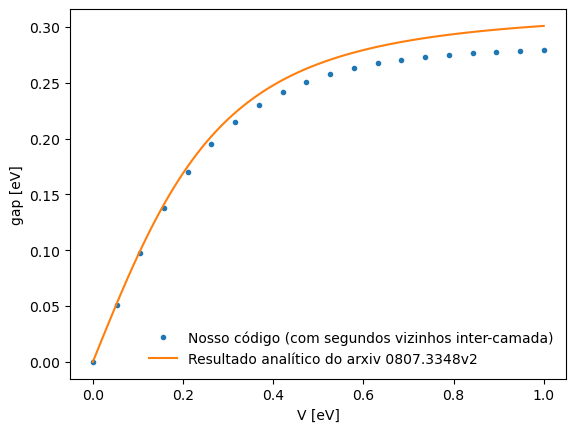

In [18]:
VV2=np.linspace(0,1,100)
tp=t_inter(0,0,0,0,1,1,0.0) #máximo valor do hopping interlayer, análogo do t_\perp no artigo
delta_g=tp*VV2/np.sqrt(tp**2+VV2**2)

plt.plot(VV,true_gaps,'.')
plt.plot(VV2,delta_g)

plt.legend(['Nosso código (com segundos vizinhos inter-camada)','Resultado analítico do arxiv 0807.3348v2'],frameon=False)
plt.xlabel('V [eV]')
plt.ylabel('gap [eV]')
plt.show()

O gap diminui!

Estendendo essas ideias pro grafeno twisted, o que deve acontecer devido à adição de campo elétrico? Ocorre a abertura de um gap?

In [19]:
g=TwistedBilayerGraphene(1,1)

In [20]:
G,M,K=g.Gamma,g.M[0],g.K[0]
versor=lambda p1,p2: (p2-p1)/np.linalg.norm(p2-p1)
radius=0.20
g.set_kpath([K+radius*versor(K,M),K,K+radius*versor(K,G)],[100,100])
Ktick=g.kticks[1]
g.ell=g.ell-g.ell[Ktick]

In [21]:
g.set_kpath(g.path_GMKG,[100,100,100])
Ktick=g.kticks[2]
g.ell=g.ell-g.ell[Ktick]

In [22]:
g.calc_hops(3.64)

In [23]:
g.set_hamiltonian(1.0,0.0)

In [24]:
g.calc_bands(4,0.0)

In [25]:
g.bands0=g.bands

In [26]:
g.set_hamiltonian(1.0,1.0)

In [27]:
g.calc_bands(4,0.0)

In [28]:
g.bands1=g.bands

In [29]:
def find_VBM(bands):
    critical=np.max(bands[bands<=0])
    i,j=np.argwhere(bands==critical)[0]
    return i,j

def find_VBM_and_CBM(bands,Ktick):
    bands_left=bands[0:Ktick,:]
    bands_right=bands[Ktick::,:]
    VBmax_left_index,VBmax_left=find_VBM(bands_left)
    VBmax_right_index,VBmax_right=find_VBM(bands_right)
    VBmax_right_index+=Ktick
    CBmin_left_index,CBmin_left=find_VBM(-bands_left)
    CBmin_right_index,CBmin_right=find_VBM(-bands_right)
    CBmin_right_index+=Ktick
    return [VBmax_left_index,VBmax_right_index,CBmin_left_index,CBmin_right_index],[VBmax_left,VBmax_right,CBmin_left,CBmin_right]

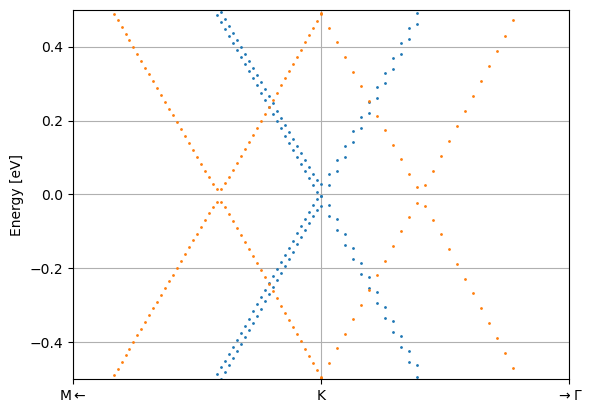

In [30]:
plt.figure()

plt.plot(g.ell,g.bands0,'.',color='tab:blue',ms=2)
plt.plot(g.ell,g.bands1,'.',color='tab:orange',ms=2)

# x,y=find_VBM_and_CBM(g.bands0,Ktick)
# plt.plot(g.ell[x],g.bands0[x,y],'ko')
# x,y=find_VBM_and_CBM(g.bands1,Ktick)
# plt.plot(g.ell[x],g.bands1[x,y],'ko')

plt.grid(True)
plt.ylabel('Energy [eV]')
plt.xticks([-radius,0,radius],['M$\\leftarrow$','K','$\\rightarrow\Gamma$'])
plt.xlim((g.ell[0],g.ell[-1]))
plt.ylim((-0.5,0.5))
plt.xlim((-radius,radius))
# plt.tight_layout()
# plt.savefig('img/electric_field_bands_tbg.png')
# plt.savefig('img/electric_field_bands_tbg.pdf')
plt.show()

E se aumentarmos o cut de hoppings intercamada?

In [31]:
g.calc_hops(6.6)

In [32]:
g.set_hamiltonian(1.0,0.0)

In [33]:
g.calc_bands(4,0.0)

In [34]:
g.bands0=g.bands

In [35]:
g.set_hamiltonian(1.0,1.0)

In [36]:
g.calc_bands(4,0.0)

In [37]:
g.bands1=g.bands

In [38]:
def find_VBM(bands):
    critical=np.max(bands[bands<=0])
    i,j=np.argwhere(bands==critical)[0]
    return i,j

def find_VBM_and_CBM(bands,Ktick):
    bands_left=bands[0:Ktick,:]
    bands_right=bands[Ktick::,:]
    VBmax_left_index,VBmax_left=find_VBM(bands_left)
    VBmax_right_index,VBmax_right=find_VBM(bands_right)
    VBmax_right_index+=Ktick
    CBmin_left_index,CBmin_left=find_VBM(-bands_left)
    CBmin_right_index,CBmin_right=find_VBM(-bands_right)
    CBmin_right_index+=Ktick
    return [VBmax_left_index,VBmax_right_index,CBmin_left_index,CBmin_right_index],[VBmax_left,VBmax_right,CBmin_left,CBmin_right]

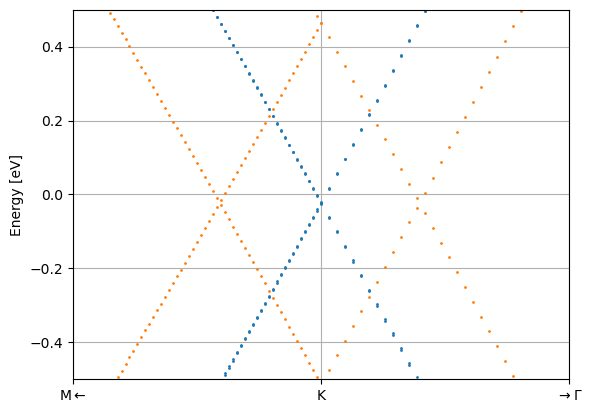

In [39]:
plt.figure()

plt.plot(g.ell,g.bands0,'.',color='tab:blue',ms=2)
plt.plot(g.ell,g.bands1,'.',color='tab:orange',ms=2)

# x,y=find_VBM_and_CBM(g.bands0,Ktick)
# plt.plot(g.ell[x],g.bands0[x,y],'ko')
# x,y=find_VBM_and_CBM(g.bands1,Ktick)
# plt.plot(g.ell[x],g.bands1[x,y],'ko')

plt.grid(True)
plt.ylabel('Energy [eV]')
plt.xticks([-radius,0,radius],['M$\\leftarrow$','K','$\\rightarrow\Gamma$'])
plt.xlim((g.ell[0],g.ell[-1]))
plt.ylim((-0.5,0.5))
plt.xlim((-radius,radius))
# plt.tight_layout()
# plt.savefig('img/electric_field_bands_tbg.png')
# plt.savefig('img/electric_field_bands_tbg.pdf')
plt.show()

As bandas do twisted dependem fortemente do cut de hoppings intercamada. Enfraquecendo o acoplamento inter-camada, parece até que ocorre a abertura de um gap. Isso sugere, em corroboração com o review de twisted, que o acoplamento intercamada interfere significamente nos resultados do grafeno twisted.

Pode ser uma boa ideia pensar um pouco sobre que hoppings devemos considerar no caso twisted para obter resultados confiáveis (será que precisamos realmente aumentar muito a quantidade de vizinhos intra- e inter-camada?). Isso parece bem menos trivial do que no caso AB.

Também pode ser interessante comparar com o artigo do Mele, onde menciona-se a abertura de um pequeníssimo gap em certas estruturas do TBG.